Only reading in one email for now

In [24]:
emailDir = "./maildir/maildir"
enroncsv = "../experiments/enron.csv"
metadataHeaders = '../experiments/metadataHeaders.csv'

In [30]:
import pandas as pd

columns = pd.read_csv(metadataHeaders, sep=',').columns.tolist()

columns

['Filename',
 'Person',
 'Directory',
 'Message-ID',
 'Date',
 'From',
 'To',
 'Subject',
 'Cc',
 'Time',
 'Attendees',
 'Re',
 'Mime-Version',
 'Content-Type',
 'Content-Transfer-Encoding',
 'Bcc',
 'X-From',
 'X-To',
 'X-cc',
 'X-bcc',
 'X-Folder',
 'X-Origin',
 'X-FileName']

In [15]:
df = pd.read_csv(enroncsv, names=columns, sep='|', low_memory=False).asarray

print("-- DONE --")

-- DONE --


Lets query the data for emails `To` _pallen\@enron.com_

In [16]:
result = df.loc[df['To'] == 'pallen@enron.com']
result

,Filename,Person,Directory,Message-ID,Date,From,To,Subject,Cc,Time,...,Content-Type,Content-Transfer-Encoding,Bcc,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName
439453,2.,allen-p,notes_inbox,<24296775.1075855678645.JavaMail.evans@thyme>,"Wed, 13 Dec 2000 10:04:00 -0800",bounce-news-932653@lists.autoweb.com,pallen@enron.com,December Newsletter - Factory Incentives are a...,NaN,NaN,...,"text/plain; charset=""us-ascii""",7bit,NaN,bounce-news-932653@lists.autoweb.com,pallen@enron.com <pallen@enron.com>,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\Notes inbox,Allen-P,pallen.nsf
439464,17.,allen-p,notes_inbox,<32191871.1075855679187.JavaMail.evans@thyme>,"Wed, 13 Dec 2000 08:47:00 -0800",webmaster@earnings.com,pallen@enron.com,FS Van Kasper Initiates Coverage of NT,NaN,NaN,...,"text/plain; charset=""ANSI_X3.4-1968""",7bit,NaN,Earnings.com <webmaster@earnings.com>,pallen@enron.com,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\Notes inbox,Allen-P,pallen.nsf
439472,19.,allen-p,notes_inbox,<25849444.1075855679233.JavaMail.evans@thyme>,"Wed, 13 Dec 2000 08:11:00 -0800",yild@zdemail.zdlists.com,pallen@enron.com,Y-Life Daily: Bush will almost definitely be p...,NaN,NaN,...,"text/plain; charset=""us-ascii""",7bit,NaN,Y-Life to Go <yild@zdemail.zdlists.com>,pallen@ENRON.COM,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\Notes inbox,Allen-P,pallen.nsf
439475,45.,allen-p,notes_inbox,<550388.1075855712741.JavaMail.evans@thyme>,"Mon, 14 May 2001 10:32:00 -0700",perfmgmt@enron.com,pallen@enron.com,Mid-Year 2001 Performance Feedback,NaN,NaN,...,"text/plain; charset=""ANSI_X3.4-1968""",7bit,NaN,Performance Evaluation Process (PEP) <perfmgmt...,"ALLEN, PHILLIP K <pallen@enron.com>",NaN,NaN,\Phillip_Allen_June2001\Notes Folders\Notes inbox,Allen-P,pallen.nsf
439476,3.,allen-p,notes_inbox,<32027475.1075855678667.JavaMail.evans@thyme>,"Wed, 13 Dec 2000 13:28:00 -0800",subscriptions@intelligencepress.com,pallen@enron.com,"NGI Publications - Thursday, 14 December 2000",NaN,NaN,...,"text/plain; charset=""us-ascii""",7bit,NaN,subscriptions@intelligencepress.com,pallen@enron.com,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\Notes inbox,Allen-P,pallen.nsf
439484,1.,allen-p,notes_inbox,<30413456.1075855678621.JavaMail.evans@thyme>,"Wed, 13 Dec 2000 18:41:00 -0800",1.11913372.-2@multexinvestornetwork.com,pallen@enron.com,"December 14, 2000 - Bear Stearns' predictions ...",NaN,NaN,...,"text/plain; charset=""us-ascii""",7bit,NaN,Multex Investor <1.11913372.-2@multexinvestorn...,<pallen@enron.com>,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\Notes inbox,Allen-P,pallen.nsf
439485,42.,allen-p,notes_inbox,<23905890.1075855679743.JavaMail.evans@thyme>,"Wed, 15 Nov 2000 06:26:00 -0800",cbpres@austin.rr.com,pallen@enron.com,Investors Alliance MF Survey for San Marcos,NaN,NaN,...,"text/plain; charset=""us-ascii""",7bit,NaN,George Richards <cbpres@austin.rr.com>,Phillip Allen <pallen@enron.com>,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\Notes inbox,Allen-P,pallen.nsf
439486,46.,allen-p,notes_inbox,<22907309.1075855712763.JavaMail.evans@thyme>,"Mon, 14 May 2001 10:24:00 -0700",webmaster@earnings.com,pallen@enron.com,"Freidman, Billings Initiates Coverage of PMCS",NaN,NaN,...,"text/plain; charset=""ANSI_X3.4-1968""",7bit,NaN,Earnings.com <webmaster@earnings.com>,pallen@enron.com,NaN,NaN,\Phillip_Allen_June2001\Notes Folders\Notes inbox,Allen-P,pallen.nsf
439497,41.,allen-p,notes_inbox,<14327988.1075855679721.JavaMail.evans@thyme>,"Thu, 30 Nov 2000 01:55:00 -0800",cbpres@austin.rr.com,pallen@enron.com,SM134,NaN,NaN,...,"text/plain; charset=""ANSI_X3.4-1968""",7bit,NaN,George Richards <cbpres@austin.rr.com>,Phillip Allen <pallen@enron.com>,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\Notes inbox,Allen-P,pallen.nsf
439510,169.,allen-p,deleted_items,<32003278.1075858634695.JavaMail.evans@thyme>,"Tue, 23 Oct 2001 22:48:28 -0700",anchordesk_daily@anchordesk.zdlists.com,pallen@enron.com,Windows XP urban legends and myths--debunked!,NaN,NaN,...,"text/plain; charset=""ANSI_X3.4-

Lets count the number of non null fields per header and make it a percentage over the total number of parsable emials

In [21]:
missingData = (517372-df.count())/517372*100

missingData

Filename                      0.000000
Person                        0.000000
Directory                     0.000000
Message-ID                    0.000387
Date                          0.000387
From                          0.000387
To                            4.222880
Subject                       3.713189
Cc                           75.279489
Time                         99.999807
Attendees                    99.994201
Re                           99.998840
Mime-Version                  0.011597
Content-Type                  0.011597
Content-Transfer-Encoding     0.010631
Bcc                          75.284322
X-From                        0.011404
X-To                          1.770680
X-cc                         75.084079
X-bcc                        99.959410
X-Folder                      0.012370
X-Origin                      0.006958
X-FileName                    0.820493
dtype: float64

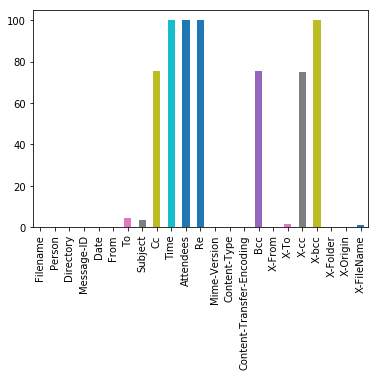

In [22]:
import matplotlib.pyplot as plt

plot = missingData.plot(kind='bar')

plt.show()

Next I will create a bag of words